### Aim :-
Develop a machine learning model to predict the likelihood of rain for the next day in various locations across Australia.

### Objective :-
1. Utilize a dataset containing 10 years of daily weather observations from various Australian locations.
2. Train and evaluate different classification models to predict the binary target variable "RainTomorrow" (Yes/No).
3. Achieve a high level of accuracy in predicting the next day's rain occurrence.
4. Provide insights into the factors influencing rain prediction through the chosen model.

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,roc_curve

## 2. Load and Explore data

In [2]:
df = pd.read_csv(r'C:\Users\adity\Downloads\weatherAUS\weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
#data type conversion from object to float 
df.Sunshine =df.Sunshine.astype(float) 

In [6]:
no = df.isnull().sum()
per= df.isnull().sum()/len(df)*100
missing_values = pd.DataFrame({"total no.":no, "percentage":per}).sort_values(ascending=False, by='total no.')
missing_values

,total no.,percentage
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [7]:
df.duplicated().sum()

0

### 2.1 Issue in Dataset 
1. data missing for Evaporation, Sunshine,WindGustSpeed, WindSpeed9am, Cloud9am, RainToday, RainTomorrow.completion

## 3. Preprocessing 

### 3.1 Dropping rows
In DataFrame that have a small number of missing values (between 0% and 5%), so droping these values for further analysis.

In [8]:
cols= [var for var in df.columns if df[var].isnull().mean()*100 >0 and df[var].isnull().mean()*100 <5]
cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [9]:
df.dropna(subset=['MinTemp','MaxTemp','Rainfall','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
 'Temp9am','Temp3pm','RainToday','RainTomorrow'], inplace = True)

In [10]:
cols= [var for var in df.columns if df[var].isnull().mean()*100 >0 and df[var].isnull().mean()*100 <5]
cols

['WindGustDir', 'WindGustSpeed']

In [11]:
df.dropna(subset=['WindGustDir', 'WindGustSpeed'], inplace=True)

In [12]:
cols= [var for var in df.columns if df[var].isnull().mean()*100 >0 and df[var].isnull().mean()*100 <5]
cols

[]

### 3.2 Mean & Mode Imputing 

In [13]:
cols_1= [var for var in df.columns if df[var].isnull().mean()*100 >5 and df[var].isnull().mean()*100 <10]
cols_1

['WindDir9am', 'Pressure9am', 'Pressure3pm']

In [14]:
num_cols = ["Pressure9am" ,"Pressure3pm"]
cat_cols = ["WindDir9am"]

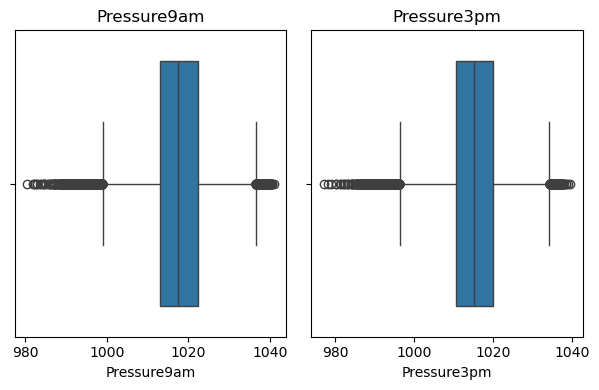

In [15]:
plt.figure(figsize=(9,4))
for i, cols in enumerate(num_cols):
     plt.subplot(1, 3, i+1)
     sns.boxplot(data=df, x=cols)
     plt.title(f"{cols}")
plt.tight_layout()
plt.show()

### Insights
1. There are large numbers of data points that act as outliers.Outliers data points will have a significant impact on the mean and hence, in such cases, it is not to use the mean for replacing the missing values.
2. we use median for imputation,as the median is less sensitive to outliers than the mean.

In [16]:
# cotinuous data
df.Pressure9am =df.Pressure9am.fillna(df.Pressure9am.median())
df.Pressure3pm =df.Pressure3pm.fillna(df.Pressure3pm.median())

In [17]:
# catogoical data
df.WindDir9am = df.WindDir9am.fillna(df.WindDir9am.mode()[0])

### 3.3 Random Imputing

In [18]:
df['Evaporation_imputed'] = df.Evaporation

In [19]:
df.Evaporation_imputed[df.Evaporation_imputed.isnull()]= df.Evaporation.dropna().sample(df.Evaporation.isnull().sum()).values

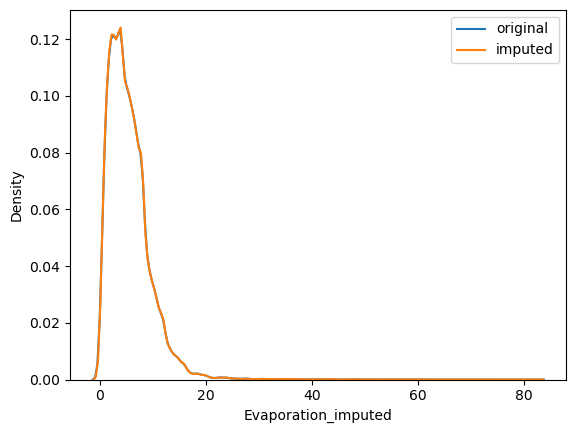

In [20]:
sns.distplot(df['Evaporation'], label='original', hist=False)
sns.distplot(df['Evaporation_imputed'], label='imputed', hist=False)

plt.legend()
plt.show()

<Axes: >

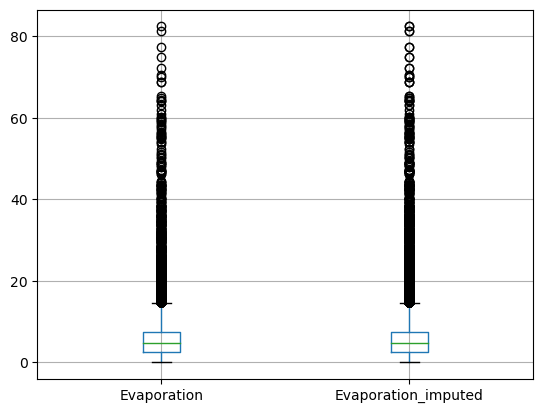

In [21]:
df[['Evaporation', 'Evaporation_imputed']].boxplot()

In [22]:
df[['Evaporation','Evaporation_imputed']].var()

Evaporation            17.613197
Evaporation_imputed    17.647724
dtype: float64

In [23]:
df['Sunshine_imputed'] = df.Sunshine

In [24]:
df.Sunshine_imputed[df.Sunshine_imputed.isnull()]= df.Sunshine.dropna().sample(df.Sunshine.isnull().sum()).values

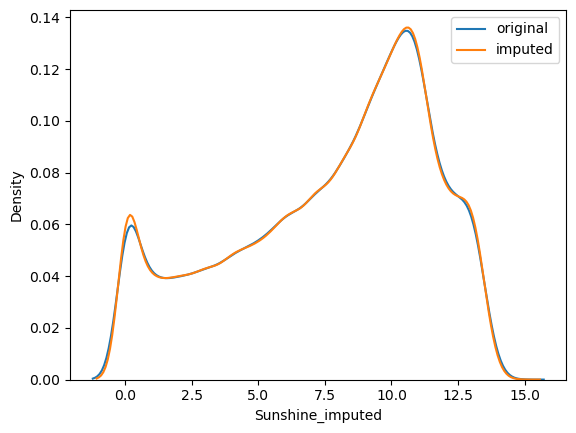

In [25]:
sns.distplot(df['Sunshine'], label='original', hist=False)
sns.distplot(df['Sunshine_imputed'], label='imputed', hist=False)

plt.legend()
plt.show()

<Axes: >

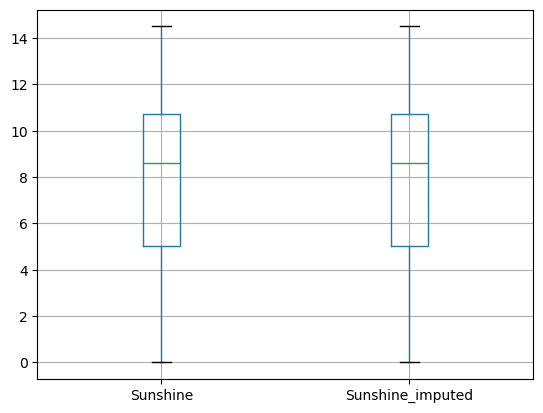

In [26]:
df[['Sunshine', 'Sunshine_imputed']].boxplot()

In [27]:
df[['Sunshine', 'Sunshine_imputed']].var()

Sunshine            14.264698
Sunshine_imputed    14.275514
dtype: float64

In [28]:
df['Cloud9am_imputed'] = df.Cloud9am

In [29]:
df.Cloud9am_imputed[df.Cloud9am_imputed.isnull()]= df.Cloud9am.dropna().sample(df.Cloud9am.isnull().sum()).values

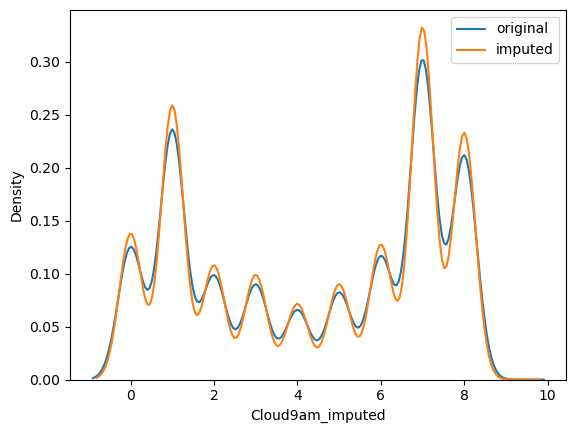

In [30]:
sns.distplot(df['Cloud9am'], label="original", hist=False)
sns.distplot(df['Cloud9am_imputed'], label="imputed", hist=False)

plt.legend()
plt.show()

<Axes: >

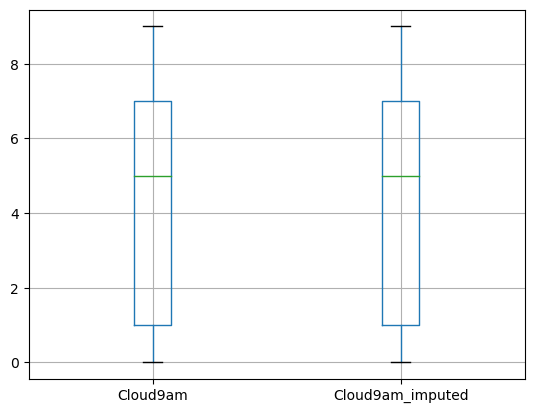

In [31]:
df[['Cloud9am', 'Cloud9am_imputed']].boxplot()

In [32]:
df[['Cloud9am', 'Cloud9am_imputed']].var()

Cloud9am            8.304450
Cloud9am_imputed    8.310804
dtype: float64

In [33]:
df['Cloud3pm_imputed'] = df.Cloud3pm

In [34]:
df.Cloud3pm_imputed[df.Cloud3pm_imputed.isnull()]= df.Cloud3pm.dropna().sample(df.Cloud3pm.isnull().sum()).values

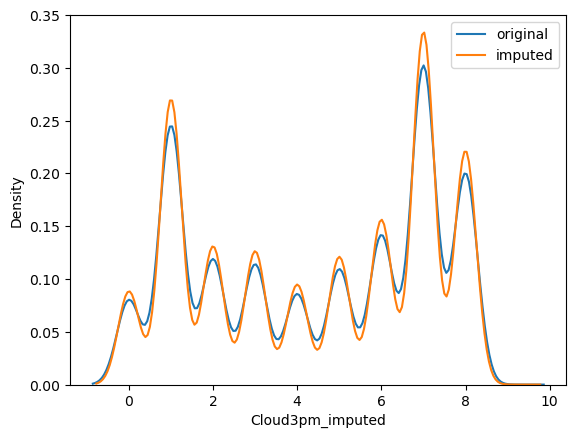

In [35]:
sns.distplot(df['Cloud3pm'], label="original", hist=False)
sns.distplot(df['Cloud3pm_imputed'], label="imputed", hist=False)

plt.legend()
plt.show()

<Axes: >

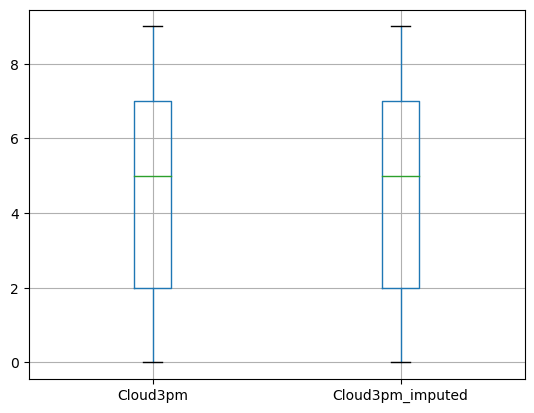

In [36]:
df[['Cloud3pm', 'Cloud3pm_imputed']].boxplot()

In [37]:
df[['Cloud3pm', 'Cloud3pm_imputed']].var()

Cloud3pm            7.399857
Cloud3pm_imputed    7.393192
dtype: float64

In [38]:
df = df.drop(['Date','Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)

In [39]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

## 4. Expolatory Data Analysis

### 4.1 Univarite Analysis

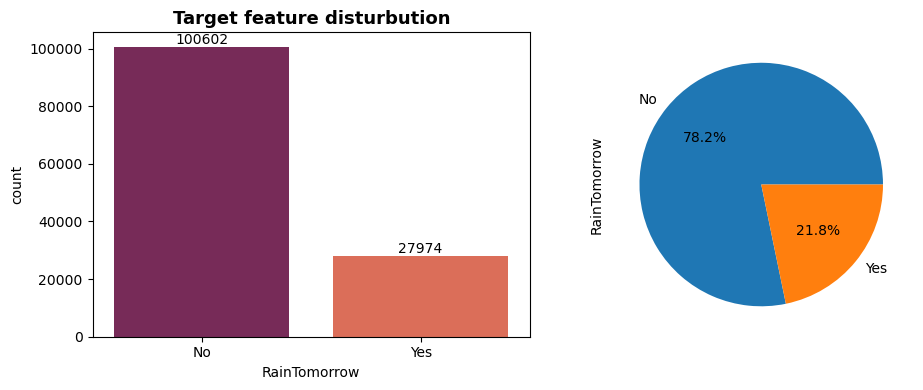

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
ax= sns.countplot(data=df, x="RainTomorrow", palette="rocket")
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Target feature disturbution",fontweight="black", size=13)

plt.subplot(1, 2, 2)
#create pie chart
df['RainTomorrow'].value_counts().plot(kind='pie',autopct='%0.1f%%')

plt.tight_layout()
plt.show()

### Insights :-
1. As we can see that the target feature classes are highly imbalanced, most of the data belongs to the "No" Class. So, we will employ some sampling technique in the later section.

In [41]:
cont_cols= df.select_dtypes(include="number").columns.to_list()

In [42]:
def cont_dist(data, feat):
    plt.figure(figsize=(13,6))
    for i, cols in enumerate(feat):
       plt.subplot(2, 4, i+1)
       sns.histplot(data=data, x=cols ,kde=True, palette="rocket",bins=30)
       plt.title(f"Disturbution of {cols}", fontweight="black", size=9)
    plt.tight_layout()
    plt.show()

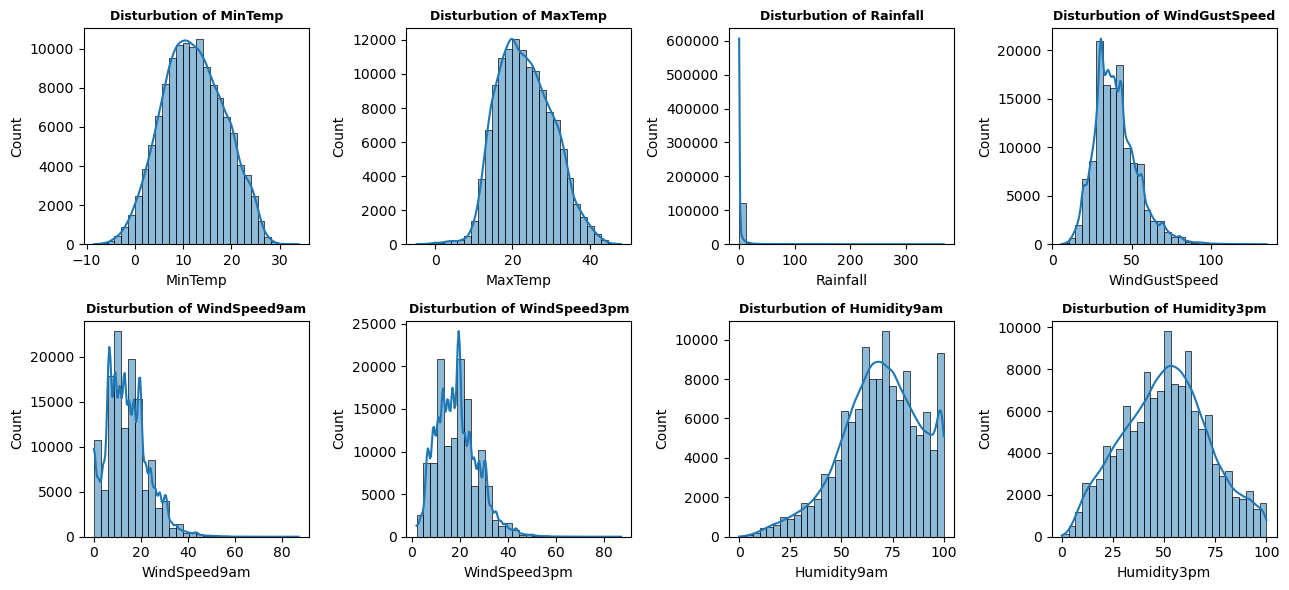

In [43]:
cont_dist(df, cont_cols[0:8])

### Insights :-
1. From the above disturbution plots, we can say that Min and Max Temp have a normal disturbutions.
2. Whereas, Other features didnot follow a normal disturbution.

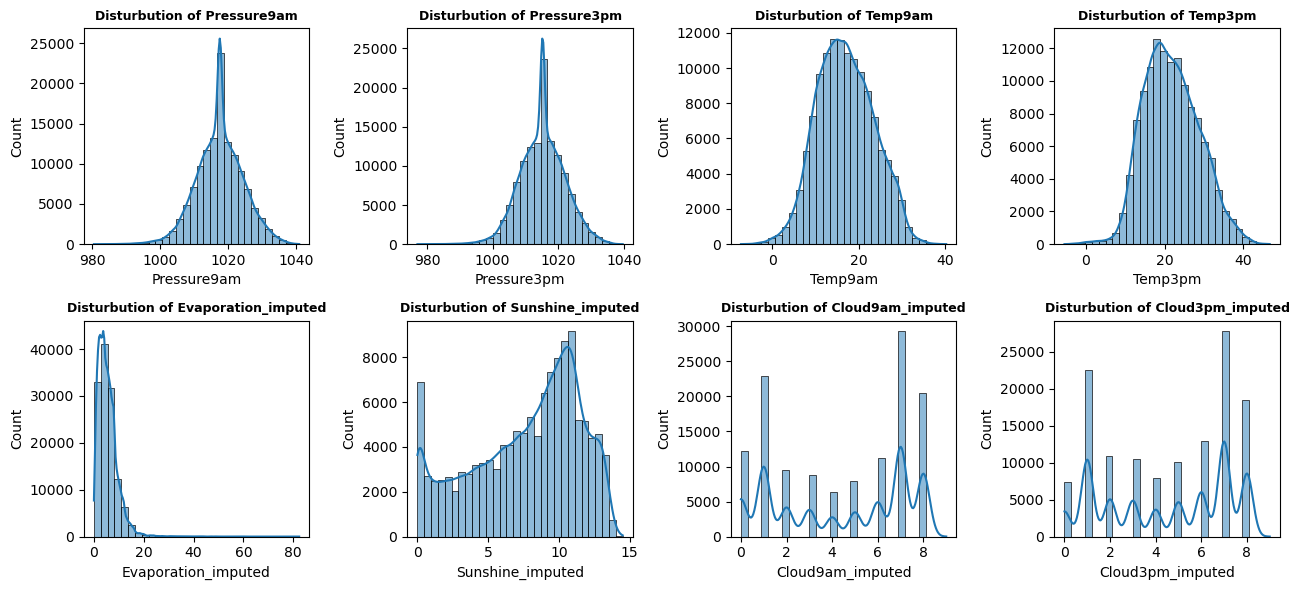

In [44]:
cont_dist(df, cont_cols[8:])

### Insights:-
1. Pressure9am and Pressure3pm disturbution have a peak at the center.
2. Temp9am and Temp3pm follows a normal disturbution.
3. Evaporation_imputed and Sunshine_imputed didnot follow a normal disturbution.

### 4.2 Bivarite Analysis
#### 4.2.1 Numrical- Categorical

In [45]:
pd.crosstab(df['RainTomorrow'],df['Location'],normalize='columns')*100

Location,Adelaide,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,78.317694,79.598776,92.209106,80.623209,74.391069,81.438751,77.723735,68.514111,81.618382,87.208481,...,83.083583,81.469979,92.474576,82.251974,66.431751,75.549451,76.27721,71.013946,76.041308,93.296666
Yes,21.682306,20.401224,7.790894,19.376791,25.608931,18.561249,22.276265,31.485889,18.381618,12.791519,...,16.916417,18.530021,7.525424,17.748026,33.568249,24.450549,23.72279,28.986054,23.958692,6.703334


In [46]:
pd.crosstab(df['RainTomorrow'],df['WindGustDir'],normalize='columns')*100

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,85.259516,84.294079,83.645194,73.25315,81.779723,77.059955,72.044025,72.090921,77.812284,81.42004,80.837156,78.441899,80.177653,73.72355,72.389403,77.228986
Yes,14.740484,15.705921,16.354806,26.74685,18.220277,22.940045,27.955975,27.909079,22.187716,18.57996,19.162844,21.558101,19.822347,26.27645,27.610597,22.771014


#### 4.2.2 Categorical - Categorical

In [47]:
pd.crosstab(df['RainToday'],df['Location'],normalize='columns')*100

Location,Adelaide,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainToday,,,,,,,,,,,,,,,,,,,,,
No,77.546917,79.564774,92.27656,80.08596,74.492558,81.235154,77.756161,68.276097,81.618382,87.314488,...,82.950383,81.090407,92.542373,81.943014,66.839763,75.721154,73.078632,70.976253,76.006885,93.124785
Yes,22.453083,20.435226,7.72344,19.91404,25.507442,18.764846,22.243839,31.723903,18.381618,12.685512,...,17.049617,18.909593,7.457627,18.056986,33.160237,24.278846,26.921368,29.023747,23.993115,6.875215


## 5. Feature Selection

In [48]:
# from sklearn.feature_selection import SelectKBest, f_classif

# num_cols1 = df.iloc[:, [1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21]]

# # SelectKBest with f_classif
# n = SelectKBest(score_func=f_classif, k =10)
# num_cols_selected = n.fit_transform(num_cols1, df['RainTomorrow'])

# # Get the selected feature indices
# selected_feature_indices = n.get_support(indices=True)

# # Get the names of selected numerical features
# selected_numerical_features = df.columns[selected_feature_indices]  # Use df instead of numerical_columns

# # Plot the scores
# plt.figure(figsize=(10, 8))
# plt.barh(selected_numerical_features, n.scores_[selected_feature_indices])
# plt.title('Best Numerical Features')
# plt.xticks(rotation= 90)
# plt.show()

In [49]:
# from scipy.stats import chi2_contingency

# cat_cols1 = df.drop(num_cols1.columns, axis=1)

# # Perform Chi-Square test and store p-values
# p_values = [1 - chi2_contingency(pd.crosstab(df['RainTomorrow'], df[i]))[1] for i in cat_cols1]

# # Plot the p-values
# plt.figure(figsize=(10, 6))
# sns.barplot(x=p_values, y=cat_cols1.columns)
# plt.title('Best Categorical Features')
# plt.axvline(x=(1 - 0.05), color='r')  # Adding a red line at the significance level (0.05)
# plt.show()

In [50]:
# l1 = list(selected_numerical_features)
# l2 = list(cat_cols1.columns)
# l3 = l1 + l2

## 6. Label Encoding

In [51]:
df.RainToday.replace({'No':0, 'Yes':1}, inplace = True)
df.RainTomorrow.replace({'No':0, 'Yes':1}, inplace = True)

In [52]:
df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [53]:
# featured columns

In [54]:
# df1 =df[l3]
# df1

## 7. Sampling 

In [55]:
df_train, df_test = train_test_split(df, test_size = 0.2)

In [56]:
df_train_x = df_train.drop(['RainTomorrow'], axis =1)
df_train_y = df_train.RainTomorrow

df_test_x = df_test.drop(['RainTomorrow'], axis =1)
df_test_y = df_test.RainTomorrow

In [57]:
df_train_x1 = df_train_x
df_test_x1 = df_test_x

## 8. Feature Scaling 

In [58]:
scaler = StandardScaler()
df_train_x=scaler.fit_transform(df_train_x)

df_test_x=scaler.fit_transform(df_test_x)

## 9. Machine Learning Models

### 9.1 Logestic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', solver='liblinear', C= 100, random_state=0)

In [60]:
logreg.fit(df_train_x,df_train_y)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [61]:
pred_test=logreg.predict(df_test_x)

In [62]:
mat_test=confusion_matrix(df_test_y,pred_test)
mat_test

array([[19107,   981],
       [ 2834,  2794]], dtype=int64)

In [63]:
accuracy_score(df_test_y,pred_test)

0.8516487789702909

In [64]:
recall_score(df_test_y,pred_test)

0.4964463397299218

In [65]:
precision_score(df_test_y,pred_test)

0.7401324503311258

In [66]:
f1_score(df_test_y,pred_test)

0.5942784217802829

In [67]:
pred_prob_test=logreg.predict_proba(df_test_x)
len(pred_prob_test)

25716

In [68]:
roc_auc_score(df_test_y,pred_prob_test[:,1]) 

0.8723565671387048

In [69]:
fpr,tpr,thre=roc_curve(df_test_y,pred_prob_test[:,1])

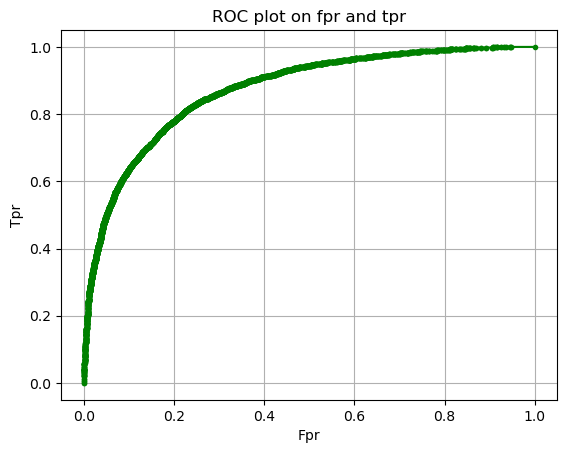

In [70]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

#### Model Enhancing 

In [71]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(logreg,
                           parameters,
                           cv = 5,
                           verbose=0)


grid_search.fit(df_train_x, df_train_y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=100, random_state=0,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}])

In [72]:
grid_search.best_params_

{'C': 1}

### 9.2 Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')

In [74]:
dt.fit(df_train_x,df_train_y)

DecisionTreeClassifier(criterion='entropy')

In [75]:
dt_pred_test=dt.predict(df_test_x)

In [76]:
dt_mat_test=confusion_matrix(df_test_y,dt_pred_test)
dt_mat_test

array([[17457,  2631],
       [ 2627,  3001]], dtype=int64)

In [77]:
accuracy_score(df_test_y,dt_pred_test)

0.7955358531653446

In [78]:
recall_score(df_test_y,dt_pred_test)

0.533226723525231

In [79]:
precision_score(df_test_y,dt_pred_test)

0.5328480113636364

In [80]:
f1_score(df_test_y,dt_pred_test)

0.5330373001776199

In [81]:
dt_pred_prob_test=dt.predict_proba(df_test_x)
len(dt_pred_prob_test)

25716

In [82]:
roc_auc_score(df_test_y,dt_pred_prob_test[:,1])

0.701126503937048

In [83]:
fpr,tpr,thre=roc_curve(df_test_y,dt_pred_prob_test[:,1])

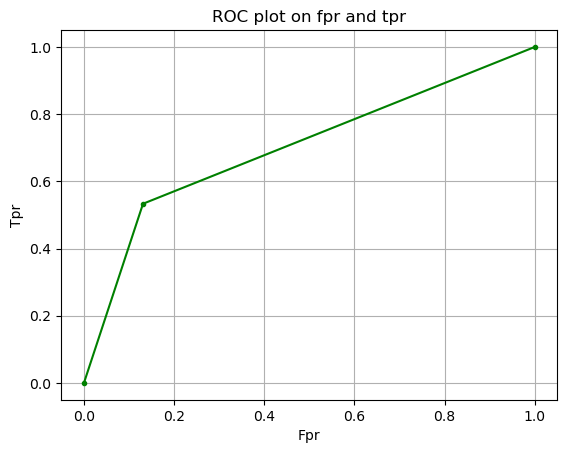

In [84]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

### 9.3 Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [86]:
rfc.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [87]:
rfc_pred_test = rfc.predict(df_test_x)

In [88]:
rfc_mat_test = confusion_matrix(df_test_y, rfc_pred_test)
rfc_mat_test

array([[19304,   784],
       [ 2824,  2804]], dtype=int64)

In [89]:
accuracy_score(df_test_y, rfc_pred_test)

0.8596982423393996

In [90]:
recall_score(df_test_y, rfc_pred_test)

0.4982231698649609

In [91]:
precision_score(df_test_y, rfc_pred_test)

0.7814938684503902

In [92]:
f1_score(df_test_y, rfc_pred_test)

0.6085069444444444

In [93]:
rfc_pred_prob_test= rfc.predict_proba(df_test_x)
len(rfc_pred_prob_test)

25716

In [94]:
roc_auc_score(df_test_y,rfc_pred_prob_test[:,1])

0.8857322822226128

In [95]:
fpr,tpr,thre =roc_curve(df_test_y,rfc_pred_prob_test[:,1])

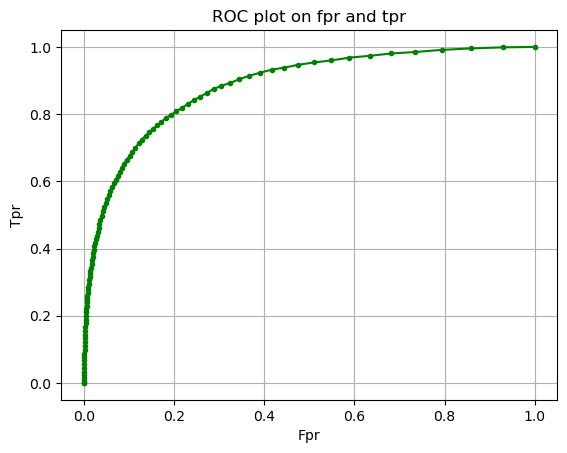

In [96]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

In [97]:
# df_x=np.array(df_train_x )
# df_x1=df.drop(['RainTomorrow'], axis =1)
# df_y=np.array(df_train_y)

# from boruta import BorutaPy

# boruta_feature_selector=BorutaPy(rfc,max_iter=25)
# boruta_feature_selector.fit(df_x,df_y)

# boruta_feature_selector.support_

# feat_imp = pd.DataFrame()
# feat_imp['col'] = df_x1.columns
# feat_imp['imp'] = boruta_feature_selector.support_
# feat_imp


# l4=[]
# for i in range (0,len(boruta_feature_selector.support_)):
#     if boruta_feature_selector.support_[i]==True:
#         l4.append(df.columns[i])

# l4

# df1= df

# df1 = df1.loc[:,l2]
# df1['RainTomorrow']=df['RainTomorrow']
# df1

# df1_train ,df1_test=train_test_split(df1,test_size=.2)

### 9.4 KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [99]:
knn.fit(df_train_x, df_train_y)

KNeighborsClassifier()

In [100]:
knn_pred_test = knn.predict(df_test_x)

In [101]:
knn_mat_test = confusion_matrix(df_test_y, knn_pred_test)
knn_mat_test

array([[18859,  1229],
       [ 2908,  2720]], dtype=int64)

In [102]:
accuracy_score(df_test_y, knn_pred_test)

0.8391273915072328

In [103]:
recall_score(df_test_y, knn_pred_test)

0.48329779673063256

In [104]:
precision_score(df_test_y, knn_pred_test)

0.6887819701190174

In [105]:
f1_score(df_test_y, knn_pred_test)

0.5680275660436462

In [106]:
knn_pred_prob_test= knn.predict_proba(df_test_x)
len(knn_pred_prob_test)

25716

In [107]:
roc_auc_score(df_test_y,knn_pred_prob_test[:,1])

0.817467659002592

In [108]:
fpr,tpr,thre=roc_curve(df_test_y,knn_pred_prob_test[:,1])

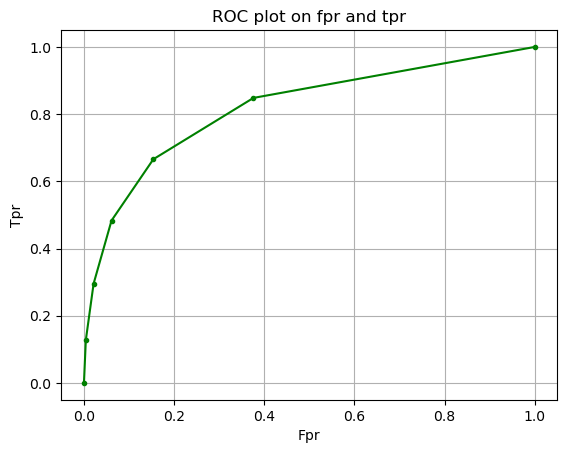

In [109]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

### 9.5 NB

In [110]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [111]:
if df_train_x1.min().min() < 0:
    df_train_x1 = df_train_x1.clip(lower=0)  # Set negatives to 0

nb = MultinomialNB()
nb.fit(df_train_x1, df_train_y)  # Now fitting should work

MultinomialNB()

In [112]:
nb_pred_test = nb.predict(df_test_x1)

In [113]:
nb_mat_test = confusion_matrix(df_test_y, nb_pred_test)
nb_mat_test

array([[16664,  3424],
       [ 1852,  3776]], dtype=int64)

In [114]:
accuracy_score(df_test_y, nb_pred_test)

0.7948358998289003

In [115]:
recall_score(df_test_y, nb_pred_test)

0.6709310589907604

In [116]:
precision_score(df_test_y, nb_pred_test)

0.5244444444444445

In [117]:
f1_score(df_test_y, nb_pred_test)

0.5887121920798254

In [118]:
nb_pred_prob_test= nb.predict_proba(df_test_x)
len(nb_pred_prob_test)

25716

In [119]:
roc_auc_score(df_test_y,nb_pred_prob_test[:,1])

0.8006571945203719

In [120]:
fpr,tpr,thre=roc_curve(df_test_y,nb_pred_prob_test[:,1])

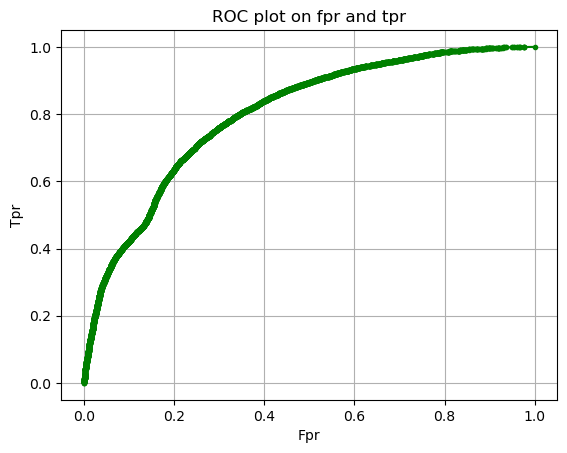

In [121]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

## 10. Outputs

In [122]:
Models = ['Logestic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'NB']

Accuracy = [accuracy_score(df_test_y,pred_test),accuracy_score(df_test_y,dt_pred_test),
             accuracy_score(df_test_y, rfc_pred_test),accuracy_score(df_test_y, knn_pred_test), 
            accuracy_score(df_test_y, nb_pred_test)]

Recall = [recall_score(df_test_y,pred_test), recall_score(df_test_y,dt_pred_test),recall_score(df_test_y,rfc_pred_test),
       recall_score(df_test_y,knn_pred_test), recall_score(df_test_y,nb_pred_test)]

Precision = [precision_score(df_test_y,pred_test), precision_score(df_test_y, dt_pred_test),
         precision_score(df_test_y, rfc_pred_test), precision_score(df_test_y, knn_pred_test),
         precision_score(df_test_y, nb_pred_test)]

In [123]:
output = pd.DataFrame()

In [124]:
output['Models'] = Models
output['Accuracy'] = Accuracy
output['Recall'] = Recall
output['Precision'] = Precision

In [125]:
output

,Models,Accuracy,Recall,Precision
0,Logestic Regression,0.851649,0.496446,0.740132
1,Decision Tree,0.795536,0.533227,0.532848
2,Random Forest,0.859698,0.498223,0.781494
3,KNN,0.839127,0.483298,0.688782
4,NB,0.794836,0.670931,0.524444


## 11. Conclusion
1. Overall Summary: Random Forest & Logestic Regression slightly performs better than the other machine learning models
2. Goal: Utilized this dataset with 10 years of daily weather observations from various Australian locations and achieved an accuracy upto 85.16% in predicting the next day's rain occurrence.
3. Recommendation: Considering the presence of null values in the current dataset, I recommend incorporating real-time weather data to address this issue and potentially improve the predictive modeling performance.